In [22]:
#!/usr/bin/env python３
# -*- coding: utf-8 -*-
 
#检测系统用户路径
import os
home_folder=os.path.expanduser("/home/xm/repository/deeplearning/数据挖掘")
print("user's path {0}".format(home_folder))
 
#拼接数据集位置
data_folder=os.path.join(home_folder,"Data","Ionosphere")
data_filename=os.path.join(data_folder,"ionosphere.data")
print("dataset's path {0}".format(data_filename))

user's path /home/xm/repository/deeplearning/数据挖掘
dataset's path /home/xm/repository/deeplearning/数据挖掘/Data/Ionosphere/ionosphere.data


In [23]:
 #引入数据集
import csv
import numpy as np
 
X=np.zeros((351,34),dtype='float')   #存351行数据
y=np.zeros((351,),dtype='bool')     #存对应的351个结果
 
#ionosphere数据集描述: 
'''
电离层数据集（Ionosphere Dataset）需要根据给定的电离层中的自由电子的雷达回波预测大气结构。
它是一个二元分类问题。每个类的观察值数量不均等，一共有 351 个观察值，34 个输入变量和1个输出变量。变量名如下：
1 17对雷达回波数据。
2 类（g 表示好，b 表示坏）。
预测最普遍类的基准性能是约 64％ 的分类准确率，最佳结果达到约 94% 的分类准确率。
'''
with open(data_filename,'r') as input_file:
    reader=csv.reader(input_file)
    for i,row in enumerate(reader):
        #获取每一行的数据,最后一列不要,并将数据转为float
        data=[float(datum) for datum in row[:-1]]
        #将取出的这一行数据存到X中
        X[i]=data
        #最后将最后一列的数据转为 1或0
        y[i]=row[-1]=='g'
        
#以上已经将数据集取出来,

X,y

(array([[ 1.     ,  0.     ,  0.99539, ..., -0.54487,  0.18641, -0.453  ],
        [ 1.     ,  0.     ,  1.     , ..., -0.06288, -0.13738, -0.02447],
        [ 1.     ,  0.     ,  1.     , ..., -0.2418 ,  0.56045, -0.38238],
        ..., 
        [ 1.     ,  0.     ,  0.94701, ...,  0.00442,  0.92697, -0.00577],
        [ 1.     ,  0.     ,  0.90608, ..., -0.03757,  0.87403, -0.16243],
        [ 1.     ,  0.     ,  0.8471 , ..., -0.06678,  0.85764, -0.06151]]),
 array([ True, False,  True, False,  True, False,  True, False,  True,
        False,  True, False,  True, False,  True, False,  True, False,
         True, False,  True, False,  True, False,  True, False,  True,
        False,  True, False,  True, False,  True, False,  True, False,
         True, False,  True, False,  True, False,  True, False,  True,
        False,  True, False,  True, False,  True, False,  True, False,
         True, False,  True, False,  True, False,  True, False,  True,
        False,  True, False,  True, F

In [24]:
 #接下来将数据集切为训练集和测试集
from sklearn.cross_validation import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=14)
print("training dataset: {0}".format(x_train.shape[0] ))
print("testing dataset: {0}".format( x_test.shape[0]))
print(" each sample has {0} features".format( x_train.shape[1]))
 

training dataset: 263
testing dataset: 88
 each sample has 34 features


In [25]:
#引入 k近邻算法
from sklearn.neighbors import KNeighborsClassifier
estimator=KNeighborsClassifier()   #目前都使用默认参数
#开始训练
estimator.fit(x_train,y_train)
#开始预测
y_predicted=estimator.predict(x_test)
 
#输出标准结果
y_test
#输出预测结果
y_predicted
 
#评估算法效果
accuracy=np.mean(y_test==y_predicted)*100
print("the accuracy is {0:.1f}%".format(accuracy))    #   86.4%
 

the accuracy is 86.4%


In [26]:
#为了避免一次性测试的运气问题，我们引入交叉检验
from sklearn.cross_validation import cross_val_score
scores=cross_val_score(estimator,X,y,scoring='accuracy')
average_accuacy=np.mean(scores)*100
print("the average accuracy is {0:.1f}%".format(average_accuacy))    # 82.3%

the average accuracy is 82.3%


In [36]:
 
###############################################################################
#接下来，通过调整参数来提高预测的准确性
#KNeighborsClassifier分类器最重要的参数是 设定几个近邻   n_neighbors
#下面将近邻参数从1到20测试一下
avg_scores=[]
all_scores=[]
parameter_values=list(range(1,21))  
for n_neighbors in parameter_values:
    estimator=KNeighborsClassifier(n_neighbors=n_neighbors)
    scores=cross_val_score(estimator,X,y,scoring='accuracy')
    avg_scores.append( np.mean(scores))
    all_scores.append( scores)
#print("the average accuracy is",avg_scores)

    

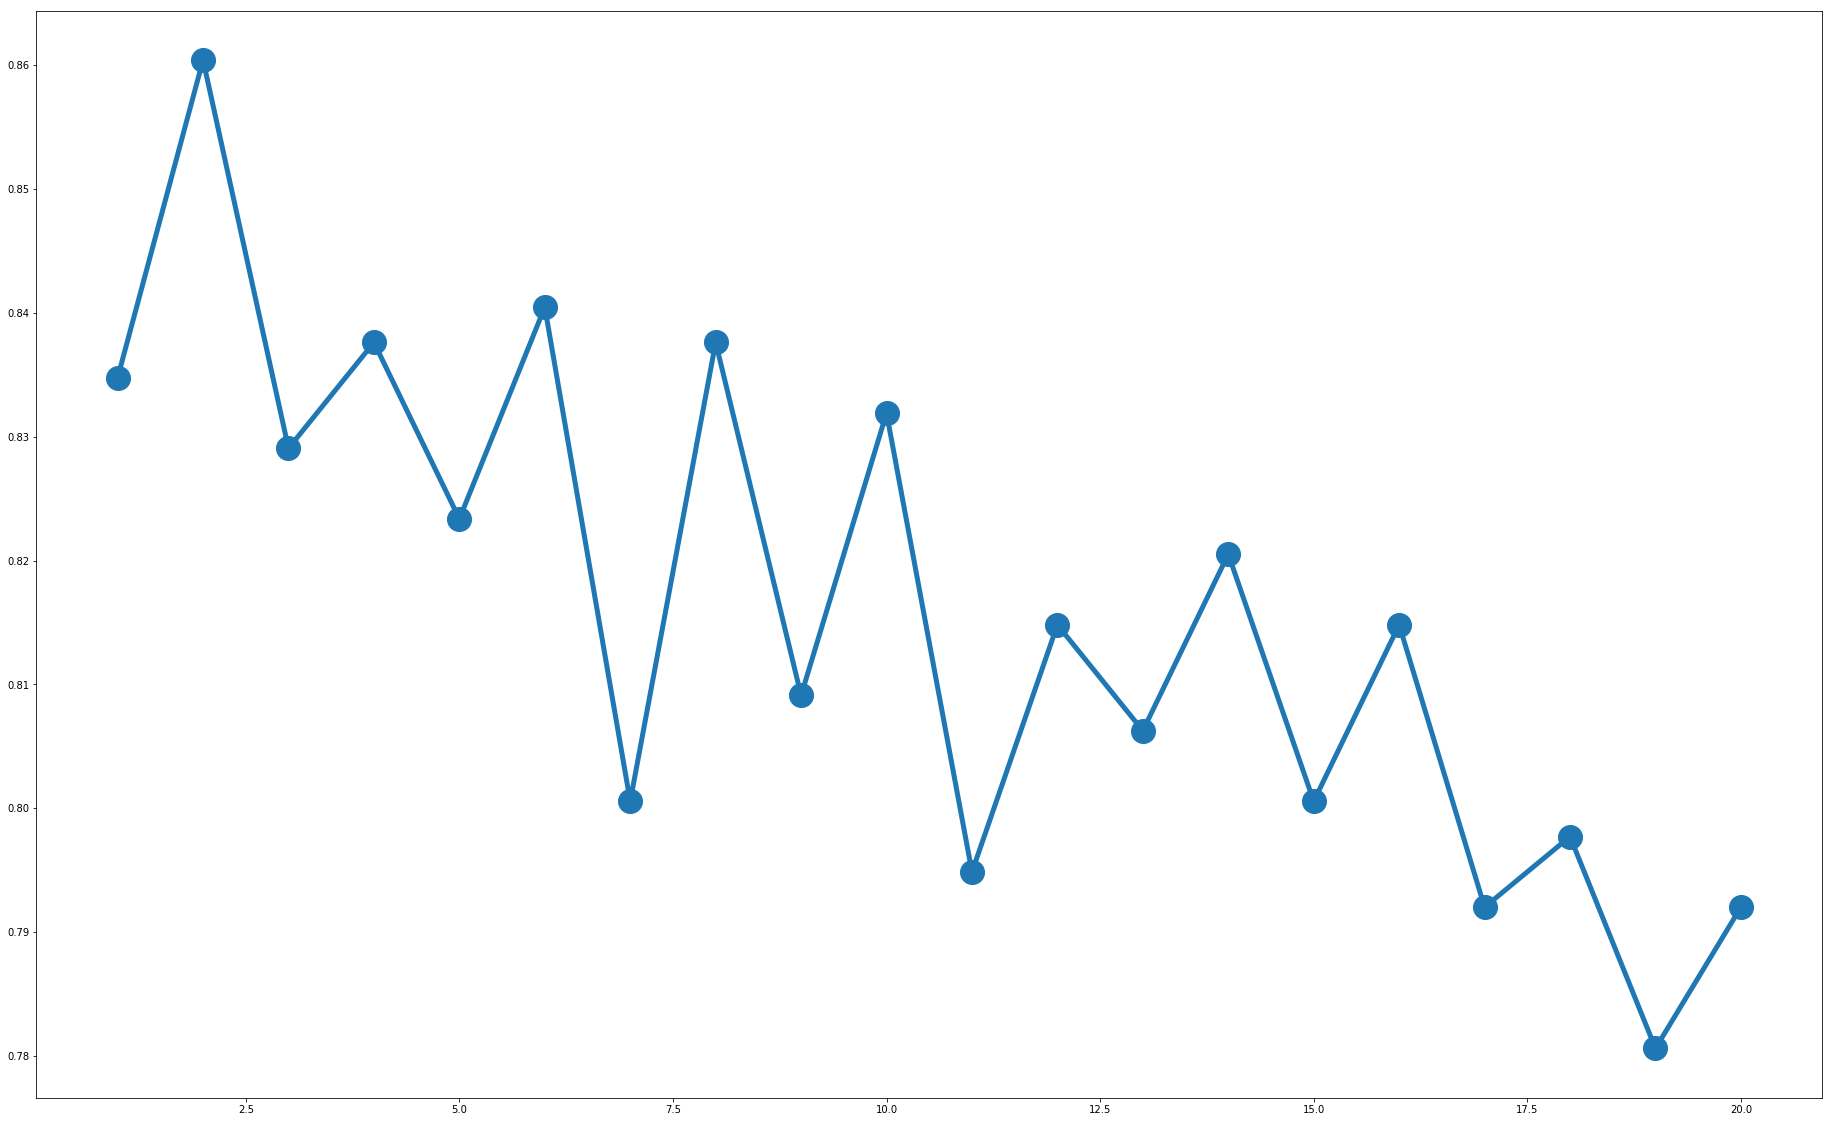

In [28]:
#使用图来分析一下n_neighbors的不同取值与分类正确率的关系

import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(32,20))
plt.plot( parameter_values, avg_scores,'-o',linewidth=5,markersize=24)
 
#随着近邻数的增加，准确率在下降.
 